# Exercici 1
## Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

## ->[Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses)

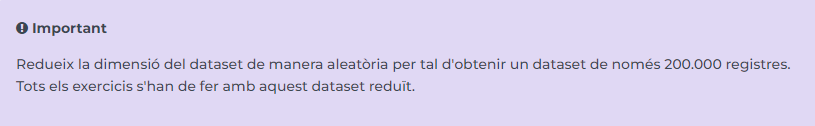

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Importamos el fichero:

Antes de imporntar el fichero, vamos a pedir que todos los valores de los dataframe con coma flotante se muestren como enteros:

In [2]:
pd.options.display.float_format = '{:.0f}'.format

Importamos el fichero:

In [3]:
datos = pd.read_csv("C:/Users/alpid/Downloads/DelayedFlights.csv")
datos.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
datos.shape

(1936758, 30)

Nota: Reduciré la base de datos a 200.000 registros cuando la haya limpiado, de manera que elimine el mínimo de datos útiles.

### 1) Entender los datos, "sanity checks" y limpiar la base de datos

### 1.1 Entender los datos

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

Para elegir las columnas que mantener debemos enteder qué significan. La explciación la encontramos investigando informaciónes de la propia web:
1. **Year** 2008
2. **Month** 1 al 12
3. **DayofMonth** 1 al 31
4. **DayOfWeek** 1 :Lunes a 7 :Domingo
5. **DepTime** Hora local real de salida (hhmm)
6. **CRSDepTime** Hora prevista de salida de los sistemas informatizados de reserva (CSR) (local, hhmm)
7. **ArrTime** Hora local real de llegada (hhmm)
8. **CRSArrTime** Hora local prevista de llegada del CSR (hhmm)
9. **UniqueCarrier** Código único del carrier (=vuelo)
10. **FlightNum** Número de vuelo
11. **TailNum** Número de cola del avion: identificador único del avion
12. **ActualElapsedTime** tiempo real transcurrido en minutos de puerta de salida a puerta de llegada = TaxiIn + TaxiOut + AirTime
13. **CRSElapsedTime** tiempo previsto transcurrido en minutos de puerta de salida a puerta de llegada
14. **AirTime** tiempo de vuelo en minutos
15. **ArrDelay** tiempo de retraso de llegada en minutos: Un vuelo se considera "puntual" si se opera con menos de 15 minutos de retraso sobre la hora prevista que figura en los sistemas informatizados de reserva (CSR) de las compañías aéreas. ArrDelay = suma (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay).
16. **DepDelay** tiempo de retraso de salida en minutos
17. **Origin** Codigo IATA del aeropuerto de origen
18. **Dest** Codigo IATA del aeropuerto de destino
19. **Distance** Distancia recorrida entre aeropuertos en millas
20. **TaxiIn** tiempo de taxi del avion desde pista a puerta de desembarque, en minutos : Se cuenta como tiempo de vuelo.
21. **TaxiOut** tiempo de taxi del avion desde puerta de embarque hasta pista, en minutos : Se cuenta como tiempo de vuelo.
22. **Cancelled** 0: No cancelado, 1: cancelado
23. **CancellationCode** Codigo de cancelación: Causa (A = CarrierDelay, B = WeatherDelay, C = NASDelay, D = SecurityDelay)
24. **Diverted** Desviado a otro aeropuerto 1 : si, 0 = no
25. **CarrierDelay** en minutos: Algunos ejemplos de sucesos que pueden determinar un retraso de la compañía aérea son: limpieza de la aeronave, avería de la aeronave, espera de la llegada de pasajeros o tripulación en tránsito, equipaje, impacto de aves, carga de mercancías, catering, informática, interrupción del equipo de la compañía aérea, legalidad de la tripulación (descanso del piloto o del auxiliar), daños causados por mercancías peligrosas, inspección técnica, repostaje de combustible, tratamiento de pasajeros discapacitados, tripulación retrasada, servicio de aseo, mantenimiento, sobreventa, servicio de agua potable, retirada de pasajero rebelde, embarque o asiento lento, estiba de equipaje de mano, retrasos por peso y centrado.
26. **WeatherDelay** en minutos: El retraso meteorológico se debe a condiciones meteorológicas extremas o peligrosas que se pronostican o se manifiestan en el punto de salida, en ruta o en el punto de llegada.
27. **NASDelay** en minutos: Los retrasos que están bajo el control del Sistema Nacional de Espacio Aéreo (NAS) pueden incluir: condiciones meteorológicas no extremas, operaciones aeroportuarias, gran volumen de tráfico, control del tráfico aéreo, etc.
28. **SecurityDelay** en minutos: Retraso de seguridad causado por la evacuación de una terminal o vestíbulo, el boarding repetido de un avión debido a un fallo de seguridad, equipos de control inoperativos y/o largas colas de más de 29 minutos en las zonas de control.
29. **LateAircraftDelay** en minutos: Retraso en la llegada a un aeropuerto debido a la llegada tardía del mismo avión a un aeropuerto anterior. El efecto dominó de un retraso anterior en aeropuertos posteriores se denomina propagación del retraso.

Para decidir qué datos dejar ao eliminar, haremos limpieza de la información, un análisis básico de las columnas donde pueda agrupar alguna o eliminar innecesarias, y definir las preguntas que quiero responder en este o siguientes ejercicios.

### 1.2 Sanity Check y limpiar la base de datos

#### 1. Lo primero que haré es eliminar la columna "Unnamed:  0" para failitarme el analisis:

In [6]:
datos = datos.drop("Unnamed: 0",1)
datos.head()

C:\Users\alpid\AppData\Local\Temp\ipykernel_10276\3903422324.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos = datos.drop("Unnamed: 0",1)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,N,0,2,0,0,0,32
4,2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


#### 2. Verificaré si hay filas en las que todos los datos son faltantes:

In [7]:
num_filas_nans = (datos.isna().all(axis=1)).sum()
num_filas_nans

0

#### 3. Verificaré si todas las columnas tienen valores o hay alguna que tenga todos Nan:

In [8]:
datos.isna().all()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum              False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
Cancelled            False
CancellationCode     False
Diverted             False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

#### 4. Verificaré las filas que tienen datos faltantes y por qué, eso no solo me da una idea de las realciones sino que me permite deicdir si las uso o no, o les cambio el valor:

In [9]:
datos.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Para realizar este análisis de los valores nulos, voy a adelantar una análisis de ellos y sus relacciones que confirmaré con el análisis de correlación.

Para ello, primero: saco las filas de cada variable que tiene valor nulo (una cada vez, pero no pongo todas las tablas porque he ido cambiando las variables en las formulas) y despues veo en aquellas otras columnas donde me salga Nan si toda la columna es Nan cuando la variable de oringen lo es. P.e. Cuando ArrTime es Nan, qué otras columnas son Nan (Y verifico si lo son toda o parte):

In [10]:
pd.set_option('display.max_columns', None) # Necesito ver todas las columnas para ver cuales dan Nan en cada caso.

In [11]:
filas_con_nulos = datos[datos["AirTime"].isnull()]
filas_con_nulos

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,2008,1,3,4,922,915,NaN,1050,WN,1069,N630WN,NaN,95,NaN,NaN,7,SAN,SMF,480,NaN,12,0,N,1,NaN,NaN,NaN,NaN,NaN
1372,2008,1,3,4,2325,1900,NaN,2030,WN,2092,N302SW,NaN,90,NaN,NaN,265,SFO,SAN,447,NaN,11,0,N,1,NaN,NaN,NaN,NaN,NaN
1776,2008,1,4,5,1949,1905,NaN,1910,WN,1403,N504SW,NaN,65,NaN,NaN,44,BOI,RNO,335,NaN,11,0,N,1,NaN,NaN,NaN,NaN,NaN
1831,2008,1,4,5,737,705,NaN,825,WN,178,N718SW,NaN,80,NaN,NaN,32,BUR,SMF,358,NaN,13,0,N,1,NaN,NaN,NaN,NaN,NaN
2244,2008,1,4,5,1849,1630,NaN,1755,WN,239,N636WN,NaN,85,NaN,NaN,139,LAS,RNO,345,NaN,12,0,N,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935651,2008,12,10,3,1459,1447,NaN,1650,DL,1706,N914DN,NaN,123,NaN,NaN,12,ATL,BUF,712,NaN,37,1,A,0,NaN,NaN,NaN,NaN,NaN
1935716,2008,12,11,4,1355,1106,7,1950,DL,26,N3747D,NaN,344,NaN,NaN,169,LAX,JFK,2475,13,17,0,N,1,NaN,NaN,NaN,NaN,NaN
1935876,2008,12,11,4,1026,955,NaN,1219,DL,892,N928DL,NaN,144,NaN,NaN,31,ATL,JFK,760,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1935978,2008,12,11,4,1527,1520,2106,1708,DL,1102,N924DL,NaN,108,NaN,NaN,7,IAD,ATL,533,9,19,0,N,1,NaN,NaN,NaN,NaN,NaN


In [12]:
filas_con_nulos ["Cancelled"].value_counts()

0    7754
1     633
Name: Cancelled, dtype: int64

Segundo: analizo qué variables son afectadas pasando a Nan cuando los vuelos son desviados o cancelados ( igual que en el anterior, no repito abajo para Cancelled y Diverted, sino que trabajo sobre la misma función intercambiando las variables a analizar):

In [51]:
filas_con_nulos1 = datos[datos["Cancelled"]==1]
filas_con_nulos1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Depdate
1542406,2008,10,27,1,1622,1420,NaN,1520,WN,27,...,19,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-10-27
1546593,2008,10,25,6,1323,1255,NaN,1442,XE,2347,...,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-10-25
1547161,2008,10,22,3,1825,1815,NaN,1927,XE,2819,...,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,2008-10-22
1547178,2008,10,22,3,1733,1715,NaN,1818,XE,2890,...,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-10-22
1548271,2008,10,15,3,1943,1745,NaN,1857,XE,2117,...,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,2008-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934590,2008,12,7,7,1526,1444,NaN,1654,DL,1743,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-12-07
1935491,2008,12,10,3,1431,1422,NaN,1527,DL,1405,...,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,2008-12-10
1935651,2008,12,10,3,1459,1447,NaN,1650,DL,1706,...,37,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-12-10
1935876,2008,12,11,4,1026,955,NaN,1219,DL,892,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-12-11


In [53]:
filas_con_nulos1["ArrDelay"].value_counts()

Series([], Name: ArrDelay, dtype: int64)

#### 5. Verifico en qué situación hay datos de las causas de Arrdelay, es decir, cuando se considera que hay un retraso.

#### Lo hago asuminedo qeu contabilizan retraso cuando hay datos de: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [42]:
datos_ArrDelay = datos.loc[(~datos["CarrierDelay"].isna()) & (~datos["WeatherDelay"].isna()) & (~datos["NASDelay"].isna()) & (~datos["SecurityDelay"].isna()) & (~datos["LateAircraftDelay"].isna()), "ArrDelay"]
datos_ArrDelay.describe()

count   1247488
mean         63
std          61
min          15
25%          26
50%          43
75%          79
max        2461
Name: ArrDelay, dtype: float64

Podemos ver que el valor mínimo es de 15 min, es decir, por debajo de 15 min se considera que no hay retraso.

### Conclusiones del analisis de valores Nan:
- Cuando **cancelamos vuelos (Cancelled)**: ArrTime, ActualElapsedTime, AirTime, ArrDelay, TaxiIn (y las causas de retraso en llegadas, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) son Nan, ya que el avion no vuela. Ojo si hay retraso en salidas, si que está contado aunque no vuele.
- Cuando **desviamos vuelos (Diverted)**: ActualElapsedTime, AirTime, ArrDelay (y las causas de retraso en llegadas) son Nan. Ojo si hay retraso en salidas, si que está contado.
- Todos los **CRSElapsedTime** Nan aparecen con vuelos desviados.
- Cuando **TaxiIn** es Nan, ArrTime, ActualElapsedTime, AirTime, ArrDelay son Nan, porque el avion ha sido **cancelado**, no así si ha sido desviado.
- Cuando **TaxiOut** es Nan, ArrTime, ActualElapsedTime, AirTime, ArrDelay, TaxiIn son Nan 
- No se cosndiera retraso vuelos con retrasos en la llegada inferiores a 15 min, y por tanto, en este caso, no se contabilizan las causas (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) .

In [16]:
pd.reset_option('display.max_columns') # Ya no necesito ver todas las columnas

#### 6. Hago una matriz de correlación graficándola para analizar relaciones:

In [17]:
Correl = datos.corr()

Grafico la matriz de correlación con un histograma de heatmap por su facilidad de análisis:

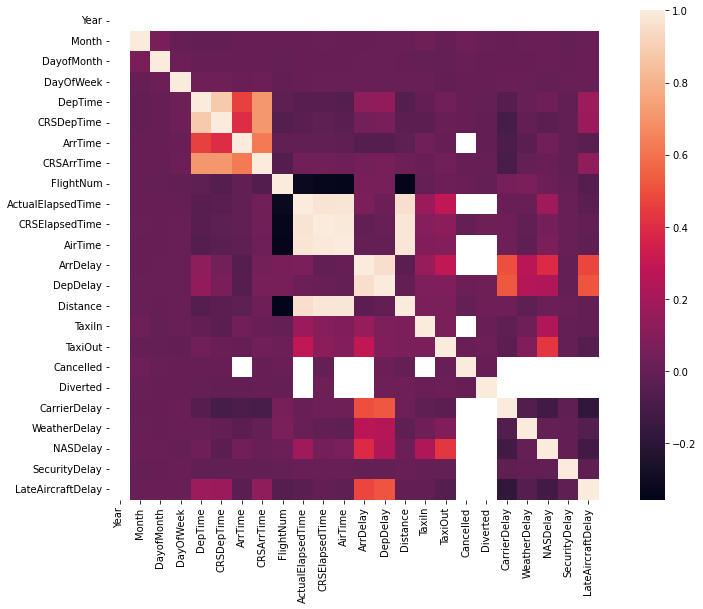

In [18]:
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(Correl, square=True);
plt.show()

### Observaciones a la matriz de correlación:
1. Para los vuelos cancelados (cancellation), nos confirma (como dijimos anteriormente) que no hay correlación con el Arrtime, ActualElapsedtime, AirTime y ArrDelay (y sus causas), TaxiIn: dado que se trata de una cancelación, no ha volado.
2. En el caso de desvios (Diverted) estamos con la misma falta de correlación que con las cancelaciones excepto con el Arrtime, y el TaxiIn, porque ha volado pero se ha desviado a otro aeropuerto, y no se ha contabilizado el ArrDelay.
3. ArrDelay y DepDelay estan muy correlados.
4. Distance está muy correlado con El ActualElapsedTime, CRSElapsedTime y Airtime como es lógico.

#### 7. Para facilitar el trabajo y eliminar las columnas Year, Month y DayofMonth, agrupo las fechas en una columna datetime:

In [108]:
datos["Depdate"] = pd.to_datetime(datos.Year*10000+datos.Month*100+datos.DayofMonth,format="%Y%m%d")

#### 8. Para decidir qué variables eliminar me escribo las preguntas que quiero resolver (incluyen las del ejercicio 2):

a) Genéricas:
- Cuantos datos faltantes hay por columna? (ya evaluado)
- Columnas nuevas: Cual es la velocidad media del vuelo? Llega tarde o no?

b) Retrasos:
- Cuales son los meses con mas retrasos
- Cuales son los dias de las semanas con mas retrasos
- A qué horas hay mas retrasos?
- Tabla de las aerolineas con mas retrasos acumulados
- Cuales son los aeropuertos con mas retrasos
- Cuales son las rutas mas largas? Cuales son las que acumulan mas retrasos las largas o las cortas?
- Los retrasos en la salida estan asociados a los retrasos en llegada, o son recuperados?
- Cual es la distribución porcentual de cancelaciones, retrasos y desvios del total de vuelos?

c) Cancelaciones:
- Cuales son los meses con mas cancelaciones
- Cuales son los dias de las semanas con más cancelaciones
- A qué horas hay más cancelaciones?
- De los vuelos retrasados cuantos son cancelados y cuanto restraso acumulan los que se cancelan
- Cuales se cancelan mas, los de larga o corta distancia.
- A partir de cuanto tiempo de taxoOut hay alta probabilidad de que cancelen el despegue.
- Cual es la distribución de las causas

d) Desvios:
- De los vuelos retrasados cuantos son desviados

#### 9. Hago la siguinte selección de columnas:


|        Columna         | La mantengo? |        Razón                                                                   |
| ---------------------- | ------------ | ------------------------------------------------------------------------------ |
|        Unnamed 0       |     No       |   Ya la he quitado                                                             |
|        Year            |     No       |   Toda la info es del mismo año y lo junto en un datetime                      |
|        Month           |     No       |   La utilizaré pero la tengo en un datetime                                    |
|       DayofMonth       |     No       |   No la necesito pero la tengo en un datetime por si acaso                     |
|       DayOfWeek        |     Si       |   Quiero saber si hay relación por días de la semana                           |
|       DepTime          |     Si       |   Me interesa saber la hora real de salida                                     |
|       CRSDepTime       |     Si       |   Me interesa saber la hora prevista de salida                                 |
|       ArrTime          |     Si       |   Me interesa saber la hora real de llegada                                    |
|       CRSArrTime       |     Si       |   Me interesa saber la hora prevista de llegada                                |  |       UNiqueCarrier    |     Si       |   Definiré los vuelos por su código de Carrrier                                |
|       FlightNum        |     No       |   Ya tengo el Código de Carrier                                                |
|       TailNum          |     No       |   Ya tengo el Código de Carrier                                                |  |   ActualElapsedTime    |     Si       |   Me interesa el tiempo real total puerta a puerta:TaxiIn + TaxiOut + AirTime  |
|   CRSElapsedTime       |     Si       |   Me interesa el tiempo total puerta a puerta estimado                         |
|       AirTime          |     Si       |   Lo necesito para saber la velocidad media de los vuelos                      |
|       ArrDelay         |     Si       |   Me interesa saber el retraso en la llegada frente al CSR previsto            |
|       DepDelay         |     Si       |   Me interesa saber el retraso en la salida frente al CSR previsto             |
|       Origin           |     Si       |   Me interesa saber el aeropuerto de origen                                    |
|       Dest             |     Si       |   Me interesa saber el aeropuerto de destino                                   |
|       Distance         |     Si       |   Me interesa saber la distancia a recorrer                                    |
|       TaxiIn           |     Si       |   Para ver el grado de aportación a los retrasos                               |
|       TaxiOut          |     Si       |   Para verificar si hay un valor a partir del cual se producen cancelaciones   |
|       Cancelled        |     Si       |   Para tabajar con las cancelaciones                                           |
|   CancellationCode     |     Si       |   Para tabajar con las cancelaciones                                           |
|       Diverted         |     Si       |   Para tabajar con los desvios                                                 |
|     CarrierDelay       |     Si       |   Para tabajar con las causas de retraso en salidas                            |
|     CarrierDelay       |     Si       |   Para tabajar con las causas de retraso en salida, vuelo o llegadas           |
|       NASDelay         |     Si       |   Para tabajar con las causas de retraso en salida, vuelo o llegadas           |
|     SecurityDelay      |     Si       |   Para tabajar con las causas de retraso en salida, vuelo o llegadas           |
|   LateAircraftDelay    |     Si       |   Para tabajar con las causas de propagación del retraso                       |


### 1.3 Limpiamos la base de datos que a partir de ahora llamaré df:

Elimino primero las columnas que no me interesan y luego reduzco la base de datos a 200.000 registros:

In [20]:
df = datos.drop(columns=["Year", "Month", "DayofMonth", "FlightNum", "TailNum"]) # Elimino las columnas que no necesito
df.insert(0, "Depdate", df.pop("Depdate"))             # Quiero poner primero la columna Depdate que he creado
df = df.sample(n=200000)                               # Y reduzco la muestra a 200000 filas.
df.head()

,Depdate,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
131071,2008-01-17,4,1610,1535,1726,1645,NW,76,70,53,...,7,16,0,N,0,35,0,6,0,0
1527272,2008-10-08,3,1156,1145,1304,1300,WN,68,75,58,...,4,6,0,N,0,NaN,NaN,NaN,NaN,NaN
865158,2008-05-20,2,1731,1700,1831,1800,AS,60,60,45,...,4,11,0,N,0,0,0,0,0,31
1368047,2008-08-18,1,1834,1824,1932,1925,MQ,58,61,35,...,13,10,0,N,0,NaN,NaN,NaN,NaN,NaN
1152343,2008-07-28,1,1747,1708,1901,1811,UA,134,123,106,...,10,18,0,N,0,0,0,11,0,39


In [21]:
df.shape

(200000, 25)

# Exercici 2
## Fes un informe complet del dataset:

* Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
* Troba quantes dades faltants hi ha per columna.
* Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
* Fes una taula de les aerolínies amb més endarreriments acumulats.
* Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
* Aporta allò que consideris rellevant.

Nota: Seguiré los puntos del ejercicio, para que no haya dudas de que está hecho y al final haré un análisis mas extenso)

#### 1. Resumen estadístico de las variables interesantes:

Graficaré algunas variables interesantes de las que podemos extraer info.
Para evitar escribir toda la programación cada vez, creo una función:

In [22]:
def R_estad(columna):
    filtered = df.loc[~np.isnan(df[columna]), columna]             # Elimino los valores Nul o Nan de la variable
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4))  # Creo tres columnas graficas de tamaño 15x4
    ax1.set_title("Estadísticas")                                  # Creo el título de la primera columna
    ax1.text(0.2, 0.2, str(filtered.describe()), fontsize=16)      # Estadisticas con .describe(), coordenadas (0.2,0.2), tamaño de texto 16
    ax2.boxplot(filtered, vert=False)                              # Grafico de cajas. vert=False para dibujarlo horizontal
    ax2.set_title("Distribución de " + columna)                    # Creo el título de la segunda columna
    ax3.hist(filtered, bins=200)                                   # Creo el histograma con ventanas de 200
    ax3.set_title('Histograma')                                    # Creo el título de la tercera columna
    plt.show()
    return

#### DepTime (Hora local de salida)

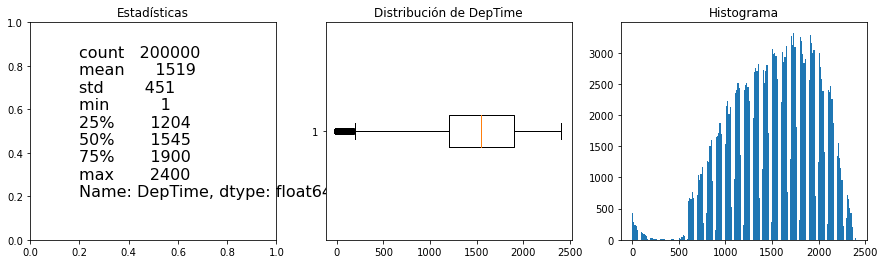

In [23]:
R_estad("DepTime")

Observamos que la media de salidas es alreadedor de las 15:19 con un 25% de vuelos despegados antes de las 12h, un 50% entre las 12h y las 19h, y el 25% restante y hasta las 24h.

#### ArrTime (Hora local de llegada)

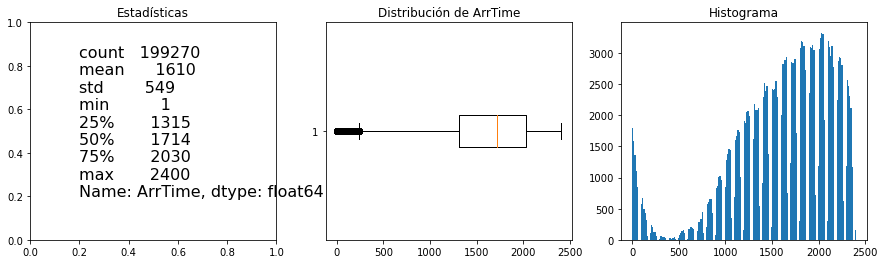

In [24]:
R_estad("ArrTime")

La media de llegadas se produce alrededor de las 16h, siendo la llegada del 50% de los vuelos entre las 13:15 ylas 20:30h, aunque vemos que hay una cantidad de vuelos que llegan despues de las 00h. 

#### CRSElapsedTime  y ActualElapsedTime (Duranción vuelo puerta a puerta, prevista y real)

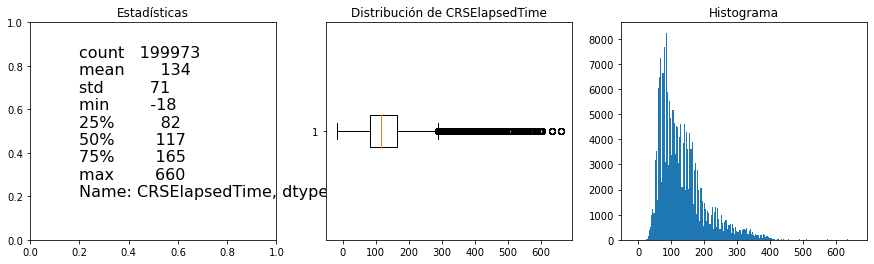

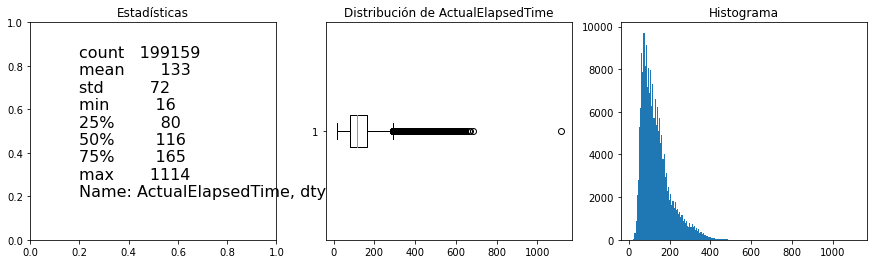

In [25]:
columnas = ["CRSElapsedTime", "ActualElapsedTime"]
for col in columnas:
    R_estad(col)

Observamos que aunque la distribución de ambas es similar la curva está muy desplazada a la izquierda, eso quiere decir que en realidad estamos viendo dos muestras:
- Una con alta densidad de vuelos mas cortos, donde la media está alrededor de 135 min de puerta a puerta con retrasos mas limitados en tiempo, y recuperados en el conjunto, haciendo que los cuartiles sean muy similares.
- Otra con vuelos de larga distancia donde el timepo de puerta donde habiendo estimado un máximo de duración de 660min pueden lelgar a ser 711min (51 min de retraso), no recuperando los retrasos en el conjunto.

#### AirTime y Distance (Tiempo de vuelo y Distancia)

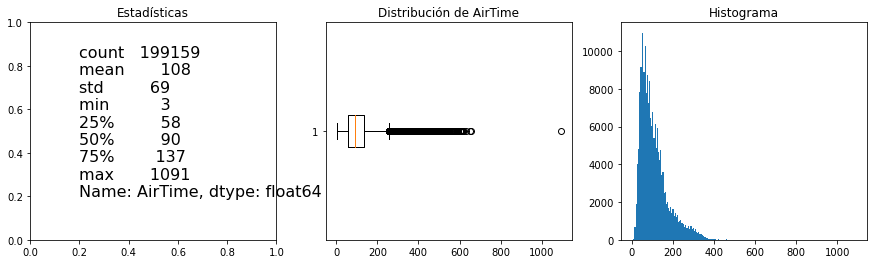

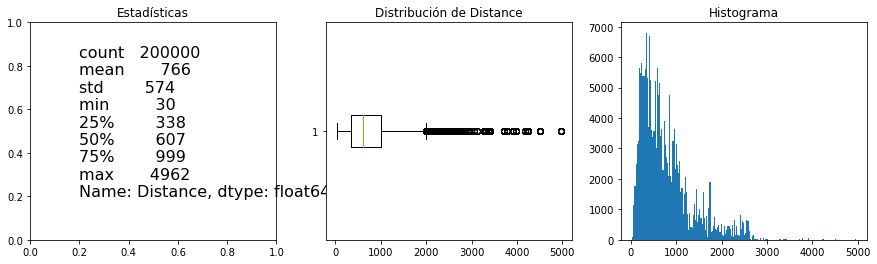

In [26]:
columnas = ["AirTime", "Distance"]
for col in columnas:
    R_estad(col)

Como visto anteriormente, la curva esta desplazda a la izquierda por la gran densidad de vuelos de corta duranción (una media cerca de 90min).
Los vuelos en su mayoria duran de media 109 min, observando nuevamente un salto muy elevado entre el percentil 75% y el 100%, donde podemos tener tiempos de vuelo de hasta 655min.

A nivel de distancias, evidentemente la curva es equivalente, excepto retrasos, siendo la emdia recorrida de 768 millas, donde la corta distancia la podemos asumir entre o y 1000 millas, llegando los vuelos de larga distancia a los 4962millas. Entre las 1000millas y los 2500millas se producen la mayoría de vuelos de larga distnacia.

Nota: No estamos viendo en Airtime los vuelos cancelados al no volar o desviados porque no se recoge la información.

#### DepDelay (Tiempo de Retraso en salidas)

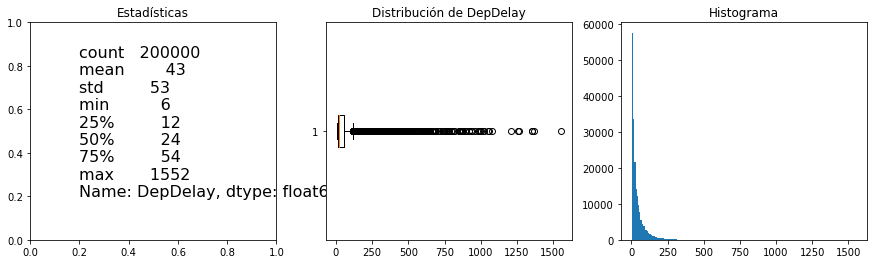

In [27]:
R_estad("DepDelay")

Observamos que la media de retraso en salidas en de 43 min, muy limitada viendo la  desviación típica, y desplazada a la izquierda con un 25% de vuelos con retrasos de salida entre 53min y 1521 min.

Nota: incluye vuelos cancelados y desviados.

#### ArrDelay (Tiempo de Retraso en llegada)

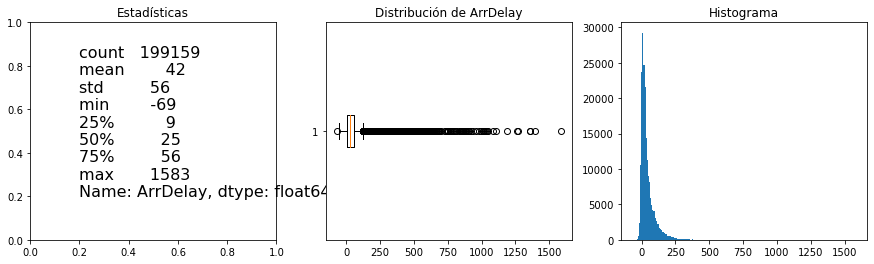

In [28]:
R_estad("ArrDelay")

Vemos un comporntamiento desplazado a la izquierda por el efecto de la alta densidad de vuelos de corta distancia y la baja de vuelos de larga distancia.
La media de retraso es de 42min, similar al de salidas, con una desviación estandar muy pequeña. Peude ser debido a una gestión de los retrasos en vuelos de corta distancia o a que se produzcan siempre lso mismos retrasos para los mismos vuelos.
Como visto anteriormente, los retrasos para vuelos de larga distancia peuden llegar a ser enormes.

Nota: no incluye vuelos cancelados por no volar, ni desviados por no tener datos objetivos de llegada.

#### TaxiIn y TaxiOut (tiempo de taxi tras el aterrizaje y antes del despegue)

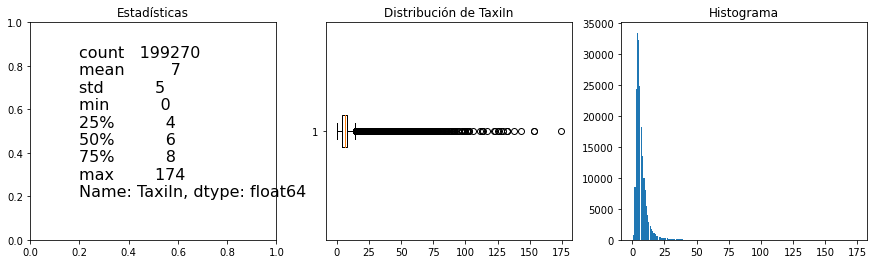

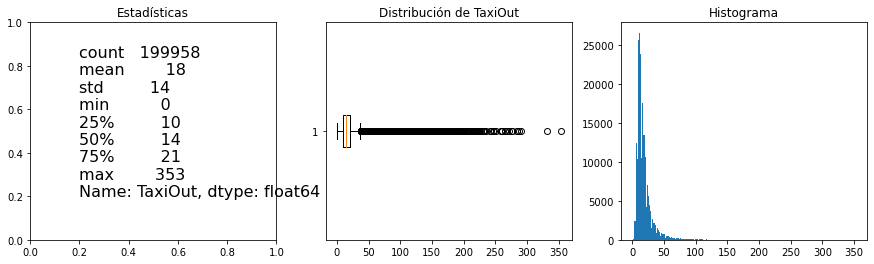

In [29]:
columnas = ["TaxiIn", "TaxiOut"]
for col in columnas:
    R_estad(col)

Nuevamente vemos distribuciones concentradas a la izquierda en la media de 7min para el TaxiIn y 18min para el TaxiOut.
En el caso del TaxiIn, los timepos están muy cooncentrados con una desviación estandar de 5 y el 75% de los valores en 8minutos, aunque pueden llegar a ser de 199.
En el caso de TaxiOut, tiene el 75% de los datos por debajo de 21min, pero con valores máximos de hasta 386min y una descciación estandar mayor.

Habrá que verificar si hay una correlacióne entre los tiempos de TaxiOut y las cancelaciones.

#### 2. Datos faltantes por columna

Para ver los datos faltantes por columnas en el dataframe df aplico .isna().sum()

In [30]:
df.isna().sum()

Depdate                  0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                730
CRSArrTime               0
UniqueCarrier            0
ActualElapsedTime      841
CRSElapsedTime          27
AirTime                841
ArrDelay               841
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 730
TaxiOut                 42
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71046
WeatherDelay         71046
NASDelay             71046
SecurityDelay        71046
LateAircraftDelay    71046
dtype: int64

Datos que ya he analizado previamente.

#### 3. Crear columnas nuevas

He creado ya la columna Depdate, pero crearé alguna mas:

* Velocidad media del vuelo:

In [31]:
df["MeanSpeed"] = df["Distance"]/df["AirTime"]*60

* Estado del vuelo en llegada:
    * On time [<15 min] = 0
    * Retrasado ]15 min,60 min] = 1
    * Muy retrasado [> 60 min] = 2
    * Cancelado = 3
    * Desviado = 4

In [32]:
df.loc[df["ArrDelay"] <= 15, "FAstatus"] = 0
df.loc[(df["ArrDelay"] > 15) & (df["ArrDelay"]<= 60), "FAstatus"] = 1
df.loc[df["ArrDelay"] > 60, "FAstatus"] = 2
df.loc[df["Diverted"] == 1, "FAstatus"] = 3
df.loc[df["Cancelled"] == 1, "FAstatus"] = 4

* Estado de vuelo en salidas:
    * On time [<15 min] = 0
    * Retrasado ]15 min,60 min] = 1
    * Muy retrasado [> 60 min] = 2
    * Cancelado = 3
    * Desviado = 4

In [33]:
df.loc[df["DepDelay"] <= 15, "FDstatus"] = 0
df.loc[(df["DepDelay"] > 15) & (df["ArrDelay"]<= 60), "FDstatus"] = 1
df.loc[df["DepDelay"] > 60, "FDstatus"] = 2
df.loc[df["Diverted"] == 1, "FDstatus"] = 3
df.loc[df["Cancelled"] == 1, "FDstatus"] = 4

In [34]:
df.head()

,Depdate,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,FAstatus,FDstatus
131071,2008-01-17,4,1610,1535,1726,1645,NW,76,70,53,...,N,0,35,0,6,0,0,336,1,1
1527272,2008-10-08,3,1156,1145,1304,1300,WN,68,75,58,...,N,0,NaN,NaN,NaN,NaN,NaN,371,0,0
865158,2008-05-20,2,1731,1700,1831,1800,AS,60,60,45,...,N,0,0,0,0,0,31,348,1,1
1368047,2008-08-18,1,1834,1824,1932,1925,MQ,58,61,35,...,N,0,NaN,NaN,NaN,NaN,NaN,240,0,0
1152343,2008-07-28,1,1747,1708,1901,1811,UA,134,123,106,...,N,0,0,0,11,0,39,352,1,1


#### 4. Tabla con las aerolíneas con mas retrasos acumulados.

- Primero lo haré teniendo en cuenta todos los tiempos de rertaso:

In [61]:
Aer_retr = df.groupby("UniqueCarrier")["ArrDelay"].sum().sort_values(ascending=False)  # Agrupo las aerolíneas y en ArrDelay sumo los retrasos d cada una
Aer_retr

UniqueCarrier
WN   1169016
AA    924578
UA    709885
MQ    658556
OO    610135
XE    525193
DL    456334
CO    424377
EV    409435
YV    383171
US    374998
NW    352234
FL    323461
B6    309721
OH    280819
9E    244704
AS    144561
F9     85373
HA     26521
AQ      2375
Name: ArrDelay, dtype: float64

- Ahora lo haré teniendo en cuenta el criterio de las Aerolíneas, es decir, no contando los retrasos inferiores a 15 min, utilizando la columna FAStatus:

In [66]:
Aer_retr15 = df[(df["FAstatus"] == 1) | (df["FAstatus"]==2)].groupby("UniqueCarrier")["ArrDelay"].sum().sort_values(ascending=False)
Aer_retr15

UniqueCarrier
WN   1094908
AA    899930
UA    696640
MQ    632770
OO    584639
XE    511781
DL    439021
CO    415134
EV    396013
YV    372923
US    365387
NW    338489
FL    310307
B6    306675
OH    272958
9E    236889
AS    138787
F9     76910
HA     24067
AQ      2235
Name: ArrDelay, dtype: float64

Las graficamos:

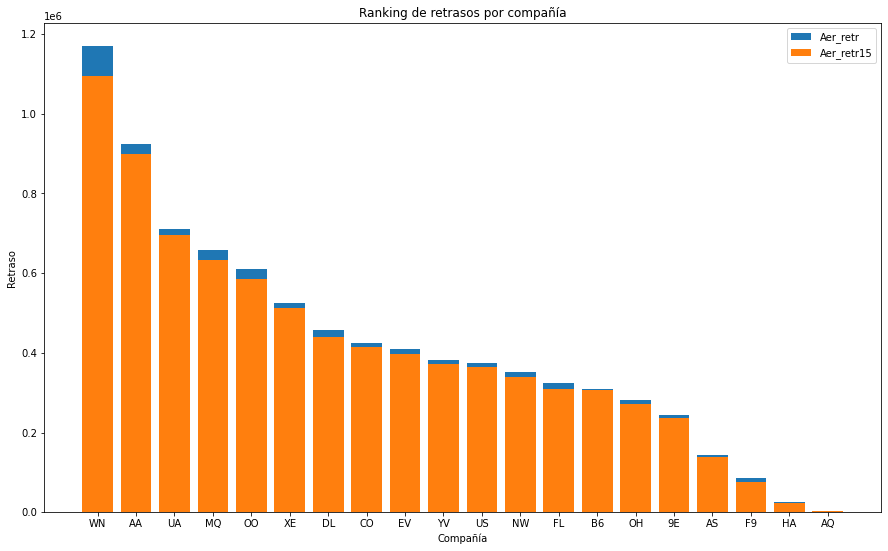

In [89]:
fig, ax = plt.subplots(figsize=(15, 9))   # Creo la figura y la venana de los ejes
x = Aer_retr.index                        # Defino los datos que voy a usar
y1 = Aer_retr.values
y2 = Aer_retr15.values
ax.bar(x,y1, label = "Aer_retr")          # Quiero usar el grafico de barras una encima de la otra y defino la leyenda
ax.bar(x,y2, label = "Aer_retr15")
ax.set_title("Ranking de retrasos por compañía")  # Titulo del gráfico
ax.set_xlabel("Compañía")                         # Etiqueta dell eje x
ax.set_ylabel("Retraso")                          # Etiqueta del eje Y
ax.legend()                                       # Agraegamos la leyendade los datos 
plt.show()

#### 5. ¿Cuales son los vuelos mas largos? ¿Y los mas retrasodos? Buscar las rutas mas largas y las que acumulan mas retraso.

Los vuelos mas largos son:

In [102]:
pd.set_option('display.max_columns', None) 

In [103]:
df_sorted = df.sort_values(by='Distance', ascending=False)
df_sorted

,Depdate,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,FAstatus,FDstatus
1249528,2008-07-07,1,1353,1335,1807,1810,CO,614,635,590,-3,18,EWR,HNL,4962,7,17,0,N,0,NaN,NaN,NaN,NaN,NaN,505,0,1
1620205,2008-10-22,3,1356,1335,1807,1810,CO,611,635,588,-3,21,EWR,HNL,4962,6,17,0,N,0,NaN,NaN,NaN,NaN,NaN,506,0,1
556367,2008-03-06,4,1334,1320,1918,1920,CO,644,660,618,-2,14,EWR,HNL,4962,7,19,0,N,0,NaN,NaN,NaN,NaN,NaN,482,0,0
872992,2008-05-17,6,1348,1335,1800,1810,CO,612,635,594,-10,13,EWR,HNL,4962,7,11,0,N,0,NaN,NaN,NaN,NaN,NaN,501,0,0
1730043,2008-11-03,1,1347,1335,1922,1935,CO,635,660,612,-13,12,EWR,HNL,4962,8,15,0,N,0,NaN,NaN,NaN,NaN,NaN,486,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240396,2008-07-09,3,1750,1737,1812,1801,AS,22,24,12,11,13,PSG,WRG,31,4,6,0,N,0,NaN,NaN,NaN,NaN,NaN,155,0,0
548152,2008-03-11,2,1611,1537,1630,1605,AS,19,28,10,25,34,PSG,WRG,31,4,5,0,N,0,0,25,0,0,0,186,1,1
353242,2008-02-10,7,1030,1013,1108,1040,AS,38,27,9,28,17,WRG,PSG,31,3,26,0,N,0,0,0,11,0,17,207,1,1
549984,2008-03-27,4,1554,1537,1627,1605,AS,33,28,16,22,17,PSG,WRG,31,5,12,0,N,0,0,0,5,0,17,116,1,1


In [104]:
Lflights = df.groupby("UniqueCarrier")["Distance"].max().sort_values(ascending=False)
Lflights

UniqueCarrier
CO    4962
DL    4502
AA    4243
UA    4243
NW    3972
US    2979
HA    2917
AS    2846
B6    2704
AQ    2677
F9    2406
WN    2363
FL    2335
OO    1659
9E    1638
OH    1522
XE    1463
MQ    1371
YV    1362
EV    1134
Name: Distance, dtype: int64

Los mas retrasados:

In [105]:
Dflights = df.groupby("UniqueCarrier")["ArrDelay"].max().sort_values(ascending=False)
Dflights

UniqueCarrier
NW   1583
AA   1357
MQ   1357
UA   1267
HA   1050
9E    871
F9    809
EV    764
CO    755
XE    687
AS    686
US    660
OH    628
WN    595
FL    587
B6    570
OO    511
YV    501
DL    482
AQ    242
Name: ArrDelay, dtype: float64

Veamos cuan correladas estan:

In [107]:
correlation = Lflights.corr(Dflights)
correlation

0.2989604981556796

Lo que quier decir que la correlación entre ambas es baja, es decir, no hay una realción clara causa-efecto entre vuelos largos y cortos.

Vamos a ver si en cambio contando con los retrasos acumulados a lo largo del año hay alguna correlación con las distancias recorrida:

In [115]:
Lflights_acum = df.groupby("UniqueCarrier")["Distance"].sum()
Dflights_acum = df.groupby("UniqueCarrier")["ArrDelay"].sum()
correlation = Lflights_acum.corr(Dflights_acum)
correlation

0.8798921797278072

Observamos un comportamiento muy distinto donde a lo largo del año, acumulando los retrasos y distancias, la correlación es alta.
Grafiquemoslos:

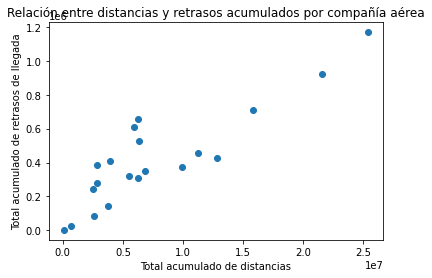

In [117]:
plt.scatter(Lflights_acum, Dflights_acum)
plt.xlabel("Total acumulado de distancias")
plt.ylabel("Total acumulado de retrasos de llegada")
plt.title("Relación entre distancias y retrasos acumulados por compañía aérea")
plt.show()

Voy a hacer una tabla con las dos listas para entender mejor los valores:

In [126]:
Lflights_acum = df.groupby("UniqueCarrier")["Distance"].sum().sort_values(ascending=False)  #Quiero ordenar la tabla por distnacia
Dflights_acum = df.groupby("UniqueCarrier")["ArrDelay"].sum()
tabla = pd.concat([Lflights_acum, Dflights_acum], axis=1)
tabla = table.sort_values(by="Distance", ascending=False)
tabla

,Distance,ArrDelay
UniqueCarrier,,
WN,25410883,1169016
AA,21554891,924578
UA,15842354,709885
CO,12866915,424377
DL,11251257,456334
US,9903539,374998
NW,6850142,352234
XE,6345341,525193
MQ,6265421,658556


Observamos que en vuelos de corta distancia se acumulan muchos retrasos de valores mas pequeños, especialemente aquellos que se mueven en distancias acumuladas de 2.4M millas 6.8M millas, mientras que en largas dsntacias la realación distancia y retraso es mas lineas aunque los retrasos acumulados son mucho mayores.

#### 6. Haré ahora unálisis contesntando a las preguntas que listé anteriormente:

Estas son:
a) Genéricas:
- Cuantos datos faltantes hay por columna?                                                                 (ya evaluado)
- Columnas nuevas: Cual es la velocidad media del vuelo? ¿Llega tarde o no?                                (ya evaluado)
- Cual es la distribución % entre retrasos, Cancelaciones y desvios.

b) Retrasos:
- Cuales son los meses con mas retrasos
- Cuales son los dias de las semanas con mas retrasos
- A qué horas hay mas retrasos?
- Tabla de las aerolineas con mas retrasos acumulados                                                      (ya evaluado)
- Cuales son los aeropuertos con mas retrasos                                                              (ya evaluado)
- Cuales son las rutas mas largas? Cuales son las que acumulan mas retrasos las largas o las cortas?
- Los retrasos en la salida estan asociados a los retrasos en llegada, o son recuperados?

c) Cancelaciones:
- Cuales son los meses con mas cancelaciones
- Cuales son los dias de las semanas con más cancelaciones
- A qué horas hay más cancelaciones?
- De los vuelos retrasados cuantos son cancelados y cuanto restraso acumulan los que se cancelan
- Cuales se cancelan mas, los de larga o corta distancia.
- A partir de cuanto tiempo de taxoOut hay alta probabilidad de que cancelen el despegue.
- Cual es la distribución de las causas

d) Desvios:
- De los vuelos retrasados cuantos son desviados

In [39]:
df_retr = df.dropna(subset=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay"])

In [40]:
df_retr.head()

,Depdate,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,FAstatus,FDstatus
131071,2008-01-17,4,1610,1535,1726,1645,NW,76,70,53,...,N,0,35,0,6,0,0,336,1,1
865158,2008-05-20,2,1731,1700,1831,1800,AS,60,60,45,...,N,0,0,0,0,0,31,348,1,1
1152343,2008-07-28,1,1747,1708,1901,1811,UA,134,123,106,...,N,0,0,0,11,0,39,352,1,1
1009574,2008-06-29,7,1729,1650,1903,1815,MQ,94,85,63,...,N,0,0,22,9,0,17,365,1,1
67265,2008-01-05,6,1441,1340,1821,1703,UA,340,323,312,...,N,0,61,0,17,0,0,461,2,2
